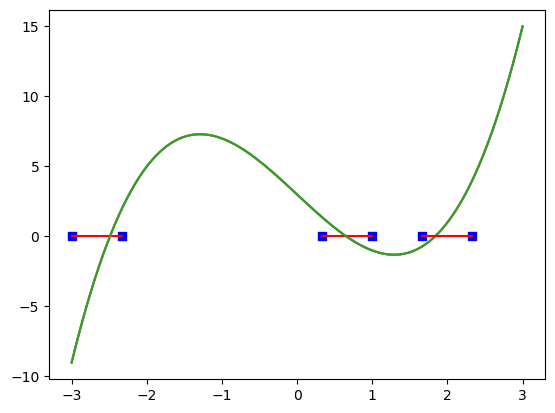

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import decimal
decimal.getcontext().prec = 50
def f(x):
    return x**3-5*x+3
def  df(x):
    return 3*x**2-5
def f_decimal(x):
    xd=decimal.Decimal(x)
    return x**3-5*x+3
def  df_decimal(x):
    xd=decimal.Decimal(x)
    return 3*xd**2-5
def find_bracket(f,rg=[-3,3],n=10,ifplot=False):
    """
    find the bracket of the root of the function f in the range rg by sampling n points
    :param f: function
    :param rg: range
    :param n: number of points
    :return: the bracket of the root
    """
    x=np.linspace(rg[0],rg[1],n)
    y=f(x)
    y_roll=np.roll(y,1)
    y_cov=y[1:]*y_roll[1:]
    cr0=np.where(y_cov<0)
    bracket=[(x[i],x[i+1]) for i in cr0[0]]
    if ifplot:
        for i in range(len(bracket)):
            xx=np.linspace(rg[0],rg[1],1000)
            plt.plot(xx,f(xx))
            plt.plot(bracket[i],[0,0],c='r')
            plt.scatter(bracket[i],[0,0],c='b',marker="s")
    return bracket
fig=plt.figure()
find_bracket(f,[-3,3],n=10,ifplot=True)
fig.savefig("f(x) with bracket.png",dpi=600)

In [54]:
bracket=find_bracket(f,[0,3],n=10)
def bisection_method(f, rg, tol=1e-4, max_iter=100,ifplot=False):
    a,b=rg
    if f(a) * f(b) >= 0:
        raise ValueError("Function does not change sign in the interval.")
    converged=0
    flist=[]
    for i in range(max_iter):
        c = (a + b) / 2
        if np.abs(b - a) < tol:
            print(f"The bisection method converged after {i} iterations")
            print(f"The root is {c}",f"The error is {np.abs(b - a)}")
            break
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
        flist.append(f(c))
    else:
        converged=1
    if converged:
        print("The bisection method did not converge after", max_iter, "iterations.")
    flist=np.array(flist)
    return (a + b) / 2,np.abs(b - a),flist

root1,error1,flist1=bisection_method(f, bracket[0], tol=1e-5, max_iter=100,ifplot=True)
root2,error2,flist2=bisection_method(f, bracket[1], tol=1e-5, max_iter=100,ifplot=True)

# plt.plot(np.log(np.abs(flist)),marker='s')
# plt.xlabel("iteration")
# plt.ylabel("log(f(xi))")

The bisection method converged after 16 iterations
The root is 0.6566187540690104 The error is 5.0862630207593185e-06
The bisection method converged after 16 iterations
The root is 1.834241231282552 The error is 5.086263020981363e-06


In [55]:

def newton_raphson_method(f_decimal, df_decimal, x0, tol,max_iter=100):
    x =decimal.Decimal(x0)
    tol=decimal.Decimal(tol)
    flist=[]
    for i in range(max_iter):
        fx = f_decimal(x)
        dfx = df_decimal(x)
        if dfx == 0:
            raise ValueError("meet zero derivative at ",x)
        dx = fx / dfx
        if abs(dx)<tol:
            print (f"The Newton-Raphson method converged after {i} iterations")
            print(f"The root is {x}\n",f"The error is {abs(dx)}")
            break
        x = x - dx
        flist.append(fx)

    return x,abs(dx),flist
root_polisthed,error_polished,flist1=newton_raphson_method(f, df, root1,tol=1e-14,max_iter=100)

The Newton-Raphson method converged after 2 iterations
The root is 0.65662043104711036614223138131117923286459122673195
 The error is 1.1871464547991473716127844534304137055407551846603E-24


In [61]:
def hybrid_method(f, df, rg, tol=1e-4, max_iter=100,ifplot=False):
    a=decimal.Decimal(rg[0])
    b=decimal.Decimal(rg[1])
    x=(a+b)/2
    if f(a) * f(b) >= 0:
        raise ValueError("Function does not change sign in the interval.")
    for i in range(max_iter):
        if abs (f(x)) < tol:
            print(f"The hybrid method converged after {i} iterations")
            print(f"The root is {x}\n",f"The error is {abs(f(x))}")
            return x
        else:
            if abs(df(x))>tol:
                x= x - f(x)/df(x)
                if x<a or x>b:
                    x=(a+b)/2
    return x
hybrid_method(f_decimal, df_decimal, [1,3], tol=1e-14, max_iter=100,ifplot=True)

The hybrid method converged after 5 iterations
The root is 1.8342431843139217171156261389599640227114079181725
 The error is 6.70162251742618945314537E-26


Decimal('1.8342431843139217171156261389599640227114079181725')

In [79]:
def hybrid_method(f, df, rg, tol=1e-4, max_iter=100):
    a=decimal.Decimal(rg[0])
    b=decimal.Decimal(rg[1])
    eps=10**(5-(decimal.getcontext()).prec)
    x=(a+b)/2
    flist=np.array([])
    if f(a) * f(b) >= 0:
        raise ValueError("Function does not change sign in the interval.")
    for i in range(max_iter):
        dfx=df(x)
        fx=f(x)
        if abs(dfx)<eps:
            x=(a+b)/2
            dx=abs(b-a)
        else:
            dx=fx/dfx
            x=x-dx
        if abs(dx)<tol:
            print(f"The hybrid method converged after {i} iterations")
            print(f"The root is {x}\n",f"The error is {abs(dx)}")
            break
    return x,abs(dx),flist
root,error,flist=hybrid_method(f_decimal, df_decimal, bracket[1], tol=1e-14, max_iter=100)

The hybrid method converged after 3 iterations
The root is 1.8342431843139217171156261258023562040781437593025
 The error is 8.1213818432868148473184715284835055185491753599621E-25


In [64]:
(decimal.getcontext()).prec

50